# Test Online EEG Data
Data: https://figshare.com/articles/The_original_EEG_data_for_driver_fatigue_detection/5202739

The Data is in .cnt and needs to be converted to .csv

In [1]:
# Imports
import os, sys
import pandas as pd
from datetime import datetime

# to enable local imports
module_path = os.path.abspath(os.path.join('code'))
if module_path not in sys.path:
    sys.path.append(module_path)

from machine_learning_data_generation import generateFeatureDf, pre_process_signal, feature_extraction
from utils import loadConfigFile
from plotFunctions import plot_magnitudeFreq_and_PSD
from pipelines import filter_signal

### Function to convert all the .cnt files to .csv - Does not need to be done again

In [2]:
def convertAllCntToCsv(fileDir : str):
    ''' Convert all the .cnt files to .csv - Needs to be done only once'''
    print("Already done this")
    return
    # loop through the subjects
    for i in range(1, 13):
        print("Converting Subject {}".format(i))
        rawCntNormal = read_raw_cnt(input_fname=os.path.join(fileDir,str(i),"Normal state.cnt"), preload=True, data_format='int32')
        df = rawCnT.to_data_frame()
        df.to_csv(os.path.join(fileDir,str(i),"Normal_state.csv"))
        
        rawCntFatigue = read_raw_cnt(input_fname=os.path.join(fileDir,str(i),"Fatigue state.cnt"), preload=True, data_format='int32')
        df = rawCnT.to_data_frame()
        df.to_csv(os.path.join(fileDir,str(i),"Fatigue_state.csv"))
        break
    print("Done")   

#convertAllCntToCsv("D:/Masterthesis/EEG_Data/eeg_data_online/")

In [3]:
import mne

mneRaw = mne.io.read_raw_cnt("D:/Masterthesis/EEG_Data/eeg_data_online/1/Normal state.cnt", data_format="int32", preload=True)

Reading 0 ... 300439  =      0.000 ...   300.439 secs...


<ipython-input-3-c01aff43b4df>:3: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  mneRaw = mne.io.read_raw_cnt("D:/Masterthesis/EEG_Data/eeg_data_online/1/Normal state.cnt", data_format="int32", preload=True)


In [4]:
mneRaw.info

<Info | 8 non-empty values
 bads: []
 ch_names: HEOL, HEOR, FP1, FP2, VEOU, VEOL, F7, F3, FZ, F4, F8, FT7, FC3, ...
 chs: 40 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 40
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>

### Test the .csv file

In [5]:
df = pd.read_csv("D:/Masterthesis/EEG_Data/eeg_data_online/1/Normal_state.csv")

#del df['Unnamed: 0']
#del df['time']

df.head()

,Unnamed: 0,time,HEOL,HEOR,FP1,FP2,VEOU,VEOL,F7,F3,...,P4,T6,A2,O1,OZ,O2,FT9,FT10,PO1,PO2
0,0,0,-18507.996188,0.0,-16469.956409,-21905.586623,-12648.357329,-1417.273052,-9619.625555,-20989.494550,...,-16887.314431,-17331.839623,0.0,-12945.376703,-10286.005522,-9498.596748,0.0,0.0,0.0,0.0
1,1,1,-18514.458587,0.0,-16473.344463,-21909.978544,-12651.431674,-1424.802061,-9623.139092,-20996.019690,...,-16890.765226,-17334.286551,0.0,-12948.827498,-10289.519060,-9501.169159,0.0,0.0,0.0,0.0
2,2,2,-18520.983727,0.0,-16474.787523,-21910.668703,-12655.572629,-1428.943015,-9625.021344,-20998.780326,...,-16892.208286,-17337.549121,0.0,-12950.270558,-10292.593405,-9502.361252,0.0,0.0,0.0,0.0
3,3,3,-18522.991463,0.0,-16472.905271,-21909.853061,-12656.451013,-1428.943015,-9623.829251,-20995.705981,...,-16889.949584,-17338.992181,0.0,-12949.015724,-10294.538398,-9501.482868,0.0,0.0,0.0,0.0
4,4,4,-18521.611144,0.0,-16469.266250,-21907.092424,-12655.007953,-1429.131240,-9620.943131,-20991.000351,...,-16886.812497,-17336.921704,0.0,-12946.819763,-10292.718888,-9499.161424,0.0,0.0,0.0,0.0


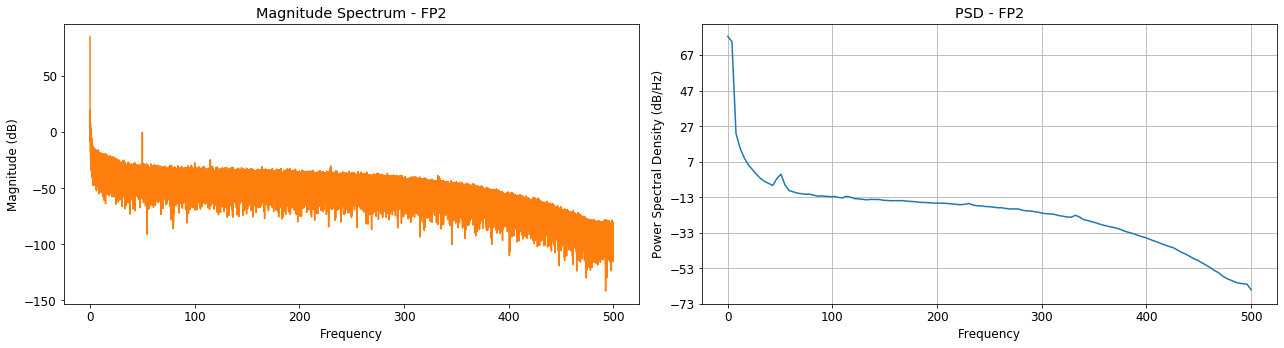

In [6]:
plot_magnitudeFreq_and_PSD(df.HEOL, samplingRate=1000, signalName="FP2")

# Main

In [7]:
GENERATE_DATA = True
print("Generate data is '{}'".format(GENERATE_DATA))
# load config
MAIN_DIR = "D:/Masterthesis/thesis_eeg/"

TARGET_AWAKE = "awake"
TARGET_NON_AWAKE = "non_awake"
TARGET_UNLABELED = "unlabeled"


SUBJECT = 2 # Subject to use
from data import onlineEegDataDict as subjectDict
yamlConfig = loadConfigFile(subjectDict[SUBJECT]["Device"])


df = pd.read_csv("D:/Masterthesis/EEG_Data/eeg_data_online/1/Normal_state.csv")
df = filter_signal(df, yamlConfig)
series_df = pre_process_signal(df=df, config=yamlConfig)
feature_series = feature_extraction(epochSeries=series_df, config=yamlConfig)



Generate data is 'True'
Loading the config file for neuroscan
Resample Signal from 1000 to 256 Hz
Creating sliding windows...
Deleting faulty data...
Deleting Nan's...
Normalizing data...
Frequenccy Bands: [(0.5, 4, 'Delta'), (4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta'), (30, 50, 'Gamma')]


C:\Users\reiss\Anaconda3\envs\ml\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 4000 is greater than input length  = 2000, using nperseg = 2000
  .format(nperseg, input_length))


Creating bandpower, lower & upper envelope dictionary...


D:\Masterthesis\thesis_eeg\code\Transformer_Feature_Extraction.py:184: RuntimeWarning: invalid value encountered in sign
  if (np.sign(aTimeSeries[k]-aTimeSeries[k-1])==1) and (np.sign(aTimeSeries[k]-aTimeSeries[k+1])==1) and ((k-lastPeak)>rejectCloserThan):
D:\Masterthesis\thesis_eeg\code\Transformer_Feature_Extraction.py:190: RuntimeWarning: invalid value encountered in sign
  if (np.sign(aTimeSeries[k]-aTimeSeries[k-1])==-1) and ((np.sign(aTimeSeries[k]-aTimeSeries[k+1]))==-1) and ((k-lastTrough)>rejectCloserThan):


Creating statistics bandpower dict...
Creating a nice feature dataframe...
